<a href="https://colab.research.google.com/github/ltoosaint24/pandas_exercises/blob/master/Loveline_toussaint_beer_classnotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

### Additional Data sources:
* https://data.world/brettcarpenter/craft-beer-data
* https://www.kaggle.com/rdoume/beerreviews

In [ ]:
beers = pd.read_csv('https://raw.githubusercontent.com/austinlasseter/pandas_exercises/master/06-feature-engineering/data/beers.csv')
beers.head()

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state
0,21st Amendment Brewery,21 Rock,American Double / Imperial IPA,9.7,2,4.00,San Francisco,CA
1,21st Amendment Brewery,21st Amendment IPA,American IPA,7.0,650,3.89,San Francisco,CA
2,21st Amendment Brewery,21st Amendment Imperial Stout,Russian Imperial Stout,10.0,4,3.88,San Francisco,CA
3,21st Amendment Brewery,21st Amendment Pale Ale,American Pale Ale (APA),5.5,7,3.86,San Francisco,CA
4,21st Amendment Brewery,5-South,American Pale Ale (APA),6.0,3,4.00,San Francisco,CA


In [ ]:
## Quick EDA

In [ ]:
beers.shape

(4640, 8)

In [ ]:
beers['beer_style'].nunique()

98

In [ ]:
# Most frequent?
beers['beer_style'].value_counts().head(5)

American IPA                      393
American Pale Ale (APA)           281
American Porter                   190
American Amber / Red Ale          184
American Double / Imperial IPA    173
Name: beer_style, dtype: int64

In [ ]:
# Highest ABV?
beers.sort_values(by = 'beer_abv', ascending=False).head(5)

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state
293,Avery Brewing Company,The Beast Grand Cru 2004,Belgian Strong Dark Ale,18.10,40,3.04,Boulder,CO
190,Arctic Craft Brewery,Warning Sign Eisbock,Eisbock,18.00,4,4.00,Colorado Springs,CO
3612,Southampton Publick House,Double Ice Bock,Eisbock,18.00,22,4.14,Southampton,NY
292,Avery Brewing Company,The Beast Grand Cru,Belgian Strong Dark Ale,16.83,506,3.46,Boulder,CO
269,Avery Brewing Company,Mephistopheles' Stout,American Double / Imperial Stout,16.80,693,3.66,Boulder,CO


In [ ]:
beers['rating'].mean()
beers['rating'].describe()
beers[beers['beer_style']=='American IPA']['beer_abv'].describe()

count    393.000000
mean       6.639491
std        0.712900
min        3.500000
25%        6.200000
50%        6.700000
75%        7.000000
max        9.600000
Name: beer_abv, dtype: float64

## Feature Engineering

In [ ]:
# Let's identify beers with "double" in their name

In [ ]:
# analyze a single cell
example_text = beers['beer_style'][1]
example_text

'American IPA'

In [ ]:
# Write a function to identify if 'double' is in beer name
def double_trouble(row):
    if 'Double' in row:
        return 'trouble'
    else:
        return 'no trouble'

In [ ]:
double_trouble(example_text)

'no trouble'

In [ ]:
# here it comes!
beers['has_double'] = beers['beer_style'].apply(double_trouble)

In [ ]:
beers.head()

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state,has_double
0,21st Amendment Brewery,21 Rock,American Double / Imperial IPA,9.7,2,4.00,San Francisco,CA,trouble
1,21st Amendment Brewery,21st Amendment IPA,American IPA,7.0,650,3.89,San Francisco,CA,no trouble
2,21st Amendment Brewery,21st Amendment Imperial Stout,Russian Imperial Stout,10.0,4,3.88,San Francisco,CA,no trouble
3,21st Amendment Brewery,21st Amendment Pale Ale,American Pale Ale (APA),5.5,7,3.86,San Francisco,CA,no trouble
4,21st Amendment Brewery,5-South,American Pale Ale (APA),6.0,3,4.00,San Francisco,CA,no trouble


In [ ]:
beers.groupby('has_double')['beer_abv'].mean()

has_double
no trouble    6.585917
trouble       9.158164
Name: beer_abv, dtype: float64

In [ ]:
# Write a function to identify if 'Ale' is in beer name
def ale_finder(row):
    if 'ale' in row.lower():
        return 1
    else:
        return 0

In [ ]:
# here it comes!
beers['is_ale'] = beers['beer_style'].apply(ale_finder)
beers.head()

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state,has_double,is_ale
0,21st Amendment Brewery,21 Rock,American Double / Imperial IPA,9.7,2,4.00,San Francisco,CA,trouble,0
1,21st Amendment Brewery,21st Amendment IPA,American IPA,7.0,650,3.89,San Francisco,CA,no trouble,0
2,21st Amendment Brewery,21st Amendment Imperial Stout,Russian Imperial Stout,10.0,4,3.88,San Francisco,CA,no trouble,0
3,21st Amendment Brewery,21st Amendment Pale Ale,American Pale Ale (APA),5.5,7,3.86,San Francisco,CA,no trouble,1
4,21st Amendment Brewery,5-South,American Pale Ale (APA),6.0,3,4.00,San Francisco,CA,no trouble,1


In [ ]:
# how many ales in the df?
beers['is_ale'].value_counts()

0    2876
1    1764
Name: is_ale, dtype: int64

In [ ]:
beers.groupby('is_ale')['num_reviews'].mean()

is_ale
0    110.078234
1     74.399660
Name: num_reviews, dtype: float64

In [ ]:
# now a more complicated function:
def beer_categories(row):
  if 'ipa' in row.lower():
    return 'ipa'
  elif 'ale' in row.lower():
    return 'ale'
  elif 'lager' in row.lower():
    return 'lager'
  elif 'pilsner' in row.lower():
    return 'pilsner'
  elif 'stout' in row.lower():
    return 'stout'
  elif 'porter' in row.lower():
    return 'porter'
  else: 
    return 'other'



In [ ]:
# apply the function
beers['beer_type']=beers['beer_style'].apply(beer_categories)
beers['beer_type'].value_counts()

ale        1723
other      1437
ipa         640
stout       440
porter      248
lager       131
pilsner      21
Name: beer_type, dtype: int64

In [ ]:
# Do some beer types have higher average ABV?
beers.groupby('beer_type')[['beer_abv']].mean().sort_values('beer_abv', ascending=False)

,beer_abv
beer_type,
stout,7.626455
pilsner,7.530952
ipa,7.325328
porter,6.902218
other,6.848580
ale,6.340714
lager,5.060916


In [ ]:
# Do some beer types have higher average rating?
beers.groupby('beer_type')[['rating']].mean().sort_values(by = 'rating', ascending=False)

,rating
beer_type,
stout,3.947068
porter,3.934597
ipa,3.875500
pilsner,3.833333
other,3.808330
ale,3.801898
lager,3.562977


## Generate Dummy Variables

What is one-hot encoding (aka, dummy variables)? 
https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [ ]:
beers.head()

,brewery_name,beer_name,beer_style,beer_abv,num_reviews,rating,city,state,has_double,is_ale,beer_type
0,21st Amendment Brewery,21 Rock,American Double / Imperial IPA,9.7,2,4.00,San Francisco,CA,trouble,0,ipa
1,21st Amendment Brewery,21st Amendment IPA,American IPA,7.0,650,3.89,San Francisco,CA,no trouble,0,ipa
2,21st Amendment Brewery,21st Amendment Imperial Stout,Russian Imperial Stout,10.0,4,3.88,San Francisco,CA,no trouble,0,stout
3,21st Amendment Brewery,21st Amendment Pale Ale,American Pale Ale (APA),5.5,7,3.86,San Francisco,CA,no trouble,1,ale
4,21st Amendment Brewery,5-South,American Pale Ale (APA),6.0,3,4.00,San Francisco,CA,no trouble,1,ale


In [ ]:
# Let's shrink our dataset
beers2 = beers[['beer_type', 'beer_abv']]
print(beers2.shape)
beers2.head()

(4640, 2)


,beer_type,beer_abv
0,ipa,9.7
1,ipa,7.0
2,stout,10.0
3,ale,5.5
4,ale,6.0


In [ ]:
# "dummy" variables convert categories into 0/1 columns
# a.k.a. "one-hot encoding"

In [ ]:
# Let's convert 'beer_style' into dummy columnsw
beer_dummies = pd.get_dummies(beers2, columns=['beer_type'], prefix='', prefix_sep='')
print(beer_dummies.shape)
print(len(beers['beer_type'].value_counts()))
beer_dummies.head(5)

(4640, 8)
7


,beer_abv,ale,ipa,lager,other,pilsner,porter,stout
0,9.7,0,1,0,0,0,0,0
1,7.0,0,1,0,0,0,0,0
2,10.0,0,0,0,0,0,0,1
3,5.5,1,0,0,0,0,0,0
4,6.0,1,0,0,0,0,0,0


In [ ]:
# Let's shrink our dataset
beers2 = beers[['beer_style', 'beer_abv']]
print(beers2.shape)
beers2.head()

(4640, 2)


,beer_style,beer_abv
0,American Double / Imperial IPA,9.7
1,American IPA,7.0
2,Russian Imperial Stout,10.0
3,American Pale Ale (APA),5.5
4,American Pale Ale (APA),6.0


In [ ]:
# Let's convert 'beer_style' into dummy columnsw
beer_dummies = pd.get_dummies(beers2, columns=['beer_style'], prefix='', prefix_sep='')
print(beer_dummies.shape)
print(len(beers['beer_style'].value_counts()))
beer_dummies.head(5)

(4640, 99)
98


,beer_abv,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,American Double / Imperial Pilsner,American Double / Imperial Stout,American IPA,American Malt Liquor,American Pale Ale (APA),American Pale Lager,American Pale Wheat Ale,American Porter,American Stout,American Strong Ale,American Wild Ale,Baltic Porter,Belgian Dark Ale,Belgian IPA,Belgian Pale Ale,Belgian Strong Dark Ale,Belgian Strong Pale Ale,Berliner Weissbier,Bière de Garde,Black & Tan,Bock,Braggot,California Common / Steam Beer,Chile Beer,Cream Ale,Czech Pilsener,Doppelbock,Dortmunder / Export Lager,Dubbel,...,Fruit / Vegetable Beer,German Pilsener,Gose,Hefeweizen,Herbed / Spiced Beer,Irish Dry Stout,Irish Red Ale,Japanese Rice Lager,Keller Bier / Zwickel Bier,Kristalweizen,Kölsch,Lambic - Fruit,Lambic - Unblended,Light Lager,Low Alcohol Beer,Maibock / Helles Bock,Milk / Sweet Stout,Munich Dunkel Lager,Munich Helles Lager,Märzen / Oktoberfest,Oatmeal Stout,Old Ale,Pumpkin Ale,Quadrupel (Quad),Rauchbier,Roggenbier,Russian Imperial Stout,Rye Beer,Saison / Farmhouse Ale,Schwarzbier,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
0,9.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# How would we use use this?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
y = beer_dummies['beer_abv']
X = beer_dummies.drop(['beer_abv'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
y_pred[:10]

array([3.96679688, 6.50585938, 5.95898438, 6.62695312, 5.80664062,
       5.15234375, 5.15234375, 6.78515625, 9.57617188, 5.95898438])

In [ ]:
list(y_test[:10])

[3.7, 7.0, 6.8, 6.0, 8.67, 4.9, 5.0, 9.2, 10.2, 5.0]

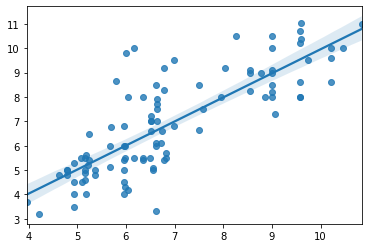

In [ ]:
sns.regplot(x=np.array(y_pred[:100]), y=np.array(y_test[:100]))

In [ ]:
import numpy as np
np.array(y_pred)

array([3.96679688, 6.50585938, 5.95898438, ..., 5.80664062, 6.64257812,
       5.37109375])

In [ ]:
np.array(y_pred).max()

9198308484464.951

In [ ]:
np.array(y_test).mean()

6.814640804597701